In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pluton.csv')

In [3]:
df.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pu238   45 non-null     float64
 1   Pu239   45 non-null     float64
 2   Pu240   45 non-null     float64
 3   Pu241   45 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


In [5]:
df.describe()

,Pu238,Pu239,Pu240,Pu241
count,45.000000,45.000000,45.000000,45.000000
mean,0.721622,69.934689,21.533489,5.329822
std,0.574343,7.133270,2.411510,3.016408
min,0.102000,58.688000,17.872000,1.674000
25%,0.162000,61.585000,19.108000,2.365000
50%,0.397000,72.907000,21.429000,3.836000
75%,1.309000,75.751000,23.239000,8.300000
max,1.638000,79.840000,25.719000,9.972000


<Axes: >

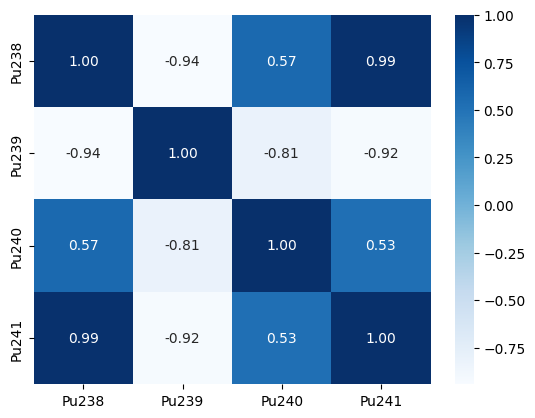

In [6]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues')

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
scaler = StandardScaler()

In [9]:
X = df

In [10]:
scaled_X = scaler.fit_transform(X)

In [11]:
model = KMeans(n_clusters=3)

In [12]:
cluster_labels = model.fit_predict(scaled_X)

In [13]:
df['cluster'] = model.labels_

In [14]:
X.head()

,Pu238,Pu239,Pu240,Pu241,cluster
0,0.126,75.804,21.204,2.180,0
1,0.133,75.515,21.408,2.240,0
2,0.127,75.175,21.668,2.305,0
3,0.156,78.872,18.428,1.906,0
4,0.503,73.317,20.223,4.128,0


<Axes: xlabel='Pu238', ylabel='Pu239'>

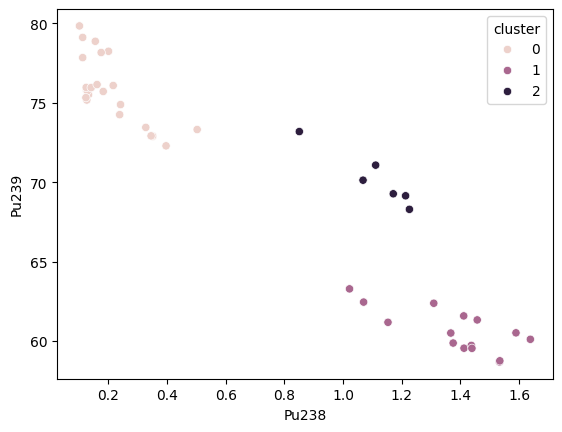

In [15]:
sns.scatterplot(x='Pu238', y='Pu239', data=df, hue='cluster')

<Axes: xlabel='Pu239', ylabel='Pu240'>

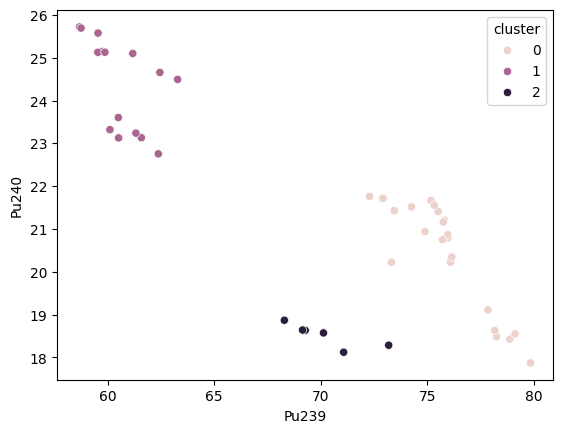

In [16]:
sns.scatterplot(x='Pu239', y='Pu240', data=df, hue='cluster')

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(scaled_X, model.predict(scaled_X))

0.6987373638905686

In [23]:
max_iter = [100, 300, 500, 1000, 5000, 10000]
data = {'scaled': scaled_X, 'default': X}
for i in max_iter:
    for j in data:
        model = KMeans(n_clusters=3, max_iter=i)
        model.fit_transform(data[j])
        print(f'Max iter={i}, data={j}, silhoutte={silhouette_score(data[j], model.predict(data[j]))}')

Max iter=100, data=scaled, silhoutte=0.4906442439691422
Max iter=100, data=default, silhoutte=0.6782467064358733
Max iter=300, data=scaled, silhoutte=0.6987373638905686
Max iter=300, data=default, silhoutte=0.5290568473933865
Max iter=500, data=scaled, silhoutte=0.6987373638905686
Max iter=500, data=default, silhoutte=0.6782467064358733
Max iter=1000, data=scaled, silhoutte=0.6987373638905686
Max iter=1000, data=default, silhoutte=0.6782467064358733
Max iter=5000, data=scaled, silhoutte=0.6987373638905686
Max iter=5000, data=default, silhoutte=0.6782467064358733
Max iter=10000, data=scaled, silhoutte=0.6987373638905686
Max iter=10000, data=default, silhoutte=0.6782467064358733
